References#
https://www.kaggle.com/neeleshshashidhar/naive-bayes/notebook

https://www.delftstack.com/howto/python/python-bold-text/

https://www.geeksforgeeks.org/pandas-how-to-shuffle-a-dataframe-rows/

https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/

https://www.pythonpool.com/remove-punctuation-python/

https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/

#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Import dataset

In [ ]:
np.random.seed(4)

url = "https://drive.google.com/uc?export=download&id=1AHKz7SuVBP2hu0Bo0MJ0H4xP-HvIWiLm"
amazon_file_read = pd.read_csv(url, error_bad_lines=False, delimiter='\t', names=('Sentences', 'Score'))
amazon_sample = amazon_file_read.sample(frac=1)
amazon_dataset = amazon_sample.replace('[^\w\s]','', regex=True)
print(amazon_dataset)

                                             Sentences  Score
698  Because both ears are occupied background is n...      1
577                             That company is a joke      0
763  This particular model would not work with my M...      0
790                                  NOT WHAT I WANTED      0
520  My only complaint is the standard sound volume...      0
..                                                 ...    ...
897                    Dont buy this product  It fails      0
709  Appears to actually outperform the original ba...      1
439  If you dont find it too bad as again the unit ...      0
174  The file browser offers all the options that o...      1
122                  Iam very pleased with my purchase      1

[1000 rows x 2 columns]


#Split dataset as train, development and test

In [ ]:
train_size = 0.8

development_size = 0.1

test_size = 0.1
number_1 = 1
number_0 = 0

train_dataset_size, development_dataset_size, test_dataset_size = [int(train_size*len(amazon_dataset)), int(development_size*len(amazon_dataset)), int(test_size*len(amazon_dataset))]
train_dataset = amazon_dataset[:train_dataset_size]
print('\033[1m'+ "\t\tTrain dataset\n\n" + '\033[0m' ,train_dataset)

development_dataset = amazon_dataset[train_dataset_size:train_dataset_size+development_dataset_size]
print('\033[1m'+ "\n\t\tDevelopment dataset\n\n" + '\033[0m' ,development_dataset)

test_dataset = amazon_dataset[train_dataset_size+development_dataset_size:train_dataset_size+development_dataset_size+test_dataset_size]
print('\033[1m'+ "\n\t\tTest dataset\n\n" + '\033[0m' ,test_dataset)

# Total probability of positive train and negative train
total_probability_positive = (len(train_dataset[train_dataset['Score'] == number_1]))/(len(train_dataset))
total_probability_negative = (len(train_dataset[train_dataset['Score'] == number_0]))/(len(train_dataset))


		Train dataset

                                              Sentences  Score
698  Because both ears are occupied background is n...      1
577                             That company is a joke      0
763  This particular model would not work with my M...      0
790                                  NOT WHAT I WANTED      0
520  My only complaint is the standard sound volume...      0
..                                                 ...    ...
667  Looks good in the picture but this case was a ...      0
797  A good quality bargain I bought this after I b...      1
931  This pair of headphones is the worst that I ha...      0
761  They have been around for years and carries th...      1
284      I got it because it was so small and adorable      1

[800 rows x 2 columns]

		Development dataset

                                              Sentences  Score
22             The commercials are the most misleading      0
227                              Im a bit disappointed      0
720

#Build a vocabulary as list


In [ ]:
# word_count = {}
# word_positive = {}
# word_negative = {}

number = 1
train_word_count = {}
train_word_positive = {}
train_word_negative = {}
def vocabulary_list(nbc_dataset):
  word_count = {}
  word_positive = {}
  word_negative = {}
  for index, row1 in nbc_dataset.iterrows():
    row_lower = row1['Sentences'].lower()
    row_split = row_lower.split()
    for expression in row_split:
      if expression in word_count:
        word_count[expression] = word_count[expression] + number
      elif expression not in word_count:
        word_count[expression] = number
      if(row1['Score'] == number):
        if expression in word_positive:
          word_positive[expression] = word_positive[expression] + number
        elif expression not in word_positive:
          word_positive[expression] = number
      elif(row1['Score'] == 0):
        if expression in word_negative:
          word_negative[expression] = word_negative[expression] + number
        elif expression not in word_negative:
          word_negative[expression] = number
  return word_count, word_positive, word_negative

train_word_count, train_word_positive, train_word_negative = vocabulary_list(train_dataset)

print('\033[1m'+ " Words\n" + '\033[0m', train_word_count)
print('\033[1m'+ " \nPositive words\n" + '\033[0m', train_word_positive)
print('\033[1m'+ " \nNegative words\n" + '\033[0m', train_word_negative)

 Words
 {'because': 18, 'both': 7, 'ears': 4, 'are': 33, 'occupied': 1, 'background': 2, 'is': 188, 'not': 99, 'distracting': 1, 'at': 20, 'all': 36, 'that': 64, 'company': 6, 'a': 174, 'joke': 2, 'this': 162, 'particular': 2, 'model': 2, 'would': 28, 'work': 23, 'with': 88, 'my': 111, 'motorola': 11, 'q': 2, 'smartphone': 1, 'what': 15, 'i': 260, 'wanted': 4, 'only': 18, 'complaint': 1, 'the': 405, 'standard': 1, 'sound': 32, 'volume': 11, 'little': 7, 'low': 9, 'even': 16, 'when': 18, 'turned': 3, 'up': 19, 'to': 157, '5of': 1, '5': 7, 'shipping': 5, 'time': 19, 'was': 80, 'also': 19, 'very': 87, 'quick': 2, 'really': 22, 'like': 26, 'product': 43, 'over': 8, 'it': 238, 'allot': 1, 'clearer': 1, 'on': 71, 'ear': 25, 'piece': 11, 'and': 246, 'mic': 4, 'of': 102, 'junk': 7, 'lose': 2, 'more': 19, 'calls': 11, 'phone': 126, 'gets': 7, 'signal': 6, 'other': 8, 'verizon': 7, 'phones': 9, 'wont': 2, 'had': 36, 'absolutely': 2, 'no': 18, 'problem': 8, 'headset': 37, 'linking': 1, '8530': 1,

#Calculate probability of the occurrence

#Calculate conditional probability based on the sentiment



In [ ]:
def conditional_probability(word_count, word_positive, word_negative, alpha_value=0):
  probability_word = {}
  probability_positive_word = {}
  probability_negative_word = {}

  for expression in word_count:
    if alpha_value == 0:
      probability_word[expression] = word_count[expression]/len(word_count)
      print('\033[1m'+ "\nProbability of the occurrence of " + expression+ '\033[0m')
      print(probability_word[expression])
      if(expression in word_negative):
        probability_negative_word[expression] = word_negative[expression]/len(word_negative)
        print('\033[1m'+ "\nConditional probability of the occurrence of " + expression + " | Negative " '\033[0m')
        print(probability_negative_word[expression])
      if(expression in word_positive):
        probability_positive_word[expression] = word_positive[expression]/len(word_positive)
        print('\033[1m'+ "\nConditional probability of the occurrence of " + expression+ " | Positive " '\033[0m')
        print(probability_positive_word[expression])
    else:
      probability_word[expression] = (word_count[expression] + alpha_value)/(len(word_count) + (2* alpha_value))
      if(expression in word_negative):
        probability_negative_word[expression] = (word_negative[expression] + alpha_value)/(len(word_negative) + (2* alpha_value))
      if(expression in word_positive):
        probability_positive_word[expression] = (word_positive[expression] + alpha_value)/(len(word_positive) + (2* alpha_value))

  return probability_word, probability_positive_word, probability_negative_word

# Function call
prob_word_train, prob_pos_word_train, prob_neg_word_train = conditional_probability(train_word_count, train_word_positive, train_word_negative)

Streaming output truncated to the last 5000 lines.
Probability of the occurrence of rather
0.0017793594306049821

Conditional probability of the occurrence of rather | Negative 
0.0017497812773403325

Conditional probability of the occurrence of rather | Positive 
0.0009910802775024777

Probability of the occurrence of bland
0.0005931198102016608

Conditional probability of the occurrence of bland | Negative 
0.0008748906386701663

Probability of the occurrence of poorly
0.0017793594306049821

Conditional probability of the occurrence of poorly | Negative 
0.0026246719160104987

Probability of the occurrence of constructed
0.0005931198102016608

Conditional probability of the occurrence of constructed | Negative 
0.0008748906386701663

Probability of the occurrence of menus
0.0005931198102016608

Conditional probability of the occurrence of menus | Negative 
0.0008748906386701663

Probability of the occurrence of navigate
0.0005931198102016608

Conditional probability of the occurrence

#Calculate accuracy and conduct
#K-fold cross validation

Streaming output truncated to the last 5000 lines.
Probability of the occurrence of biggest
0.0031446540880503146

Conditional probability of the occurrence of biggest | Negative 
0.005

Probability of the occurrence of complaint
0.0031446540880503146

Conditional probability of the occurrence of complaint | Negative 
0.005

Probability of the occurrence of drains
0.0031446540880503146

Conditional probability of the occurrence of drains | Negative 
0.005

Probability of the occurrence of superfast
0.0031446540880503146

Conditional probability of the occurrence of superfast | Negative 
0.005

Probability of the occurrence of super
0.0031446540880503146

Conditional probability of the occurrence of super | Positive 
0.006172839506172839

Probability of the occurrence of charged
0.0031446540880503146

Conditional probability of the occurrence of charged | Positive 
0.006172839506172839

Probability of the occurrence of use
0.0031446540880503146

Conditional probability of the occurrence

<BarContainer object of 5 artists>

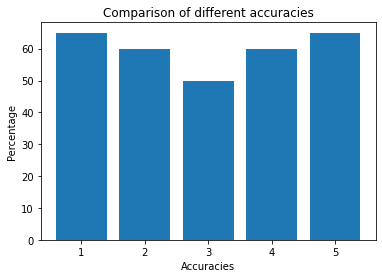

In [ ]:
#Split the dataset into 5 different datasets
k_fold = 5
test_Data = {} 
dev_dataSet_array = np.array_split(development_dataset, k_fold, axis=0)

# k_fold_cross_validation function
def k_fold_cross_validation(alpha_value = 0):
  accuracy_value = []
  for i in range(k_fold):
    test_dev_data = dev_dataSet_array[i]
    frames = []
    for j in range(k_fold):
      if j is not i:
        frames.append(dev_dataSet_array[j])
    train_dev_data = pd.concat(frames)
    # print (i)
    # print (train_dev_data)
    dev_word_count, dev_word_positive, dev_word_negative = vocabulary_list(train_dev_data)

    # print('\033[1m'+ " Words\n" + '\033[0m', dev_word_count)
    # print('\033[1m'+ " \nPositive words\n" + '\033[0m', dev_word_positive)
    # print('\033[1m'+ " \nNegative words\n" + '\033[0m', dev_word_negative)
    # *******************************************
    if alpha_value != 0:
      for index, row1 in test_dev_data.iterrows():
        row_lower = row1['Sentences'].lower()
        row_split = row_lower.split()
        for expression in row_split:
          if expression not in dev_word_count:
            dev_word_count[expression] = number
          else:
            dev_word_count[expression] = dev_word_count[expression] + number
          if expression not in dev_word_positive:
            dev_word_positive[expression] = number
          else:
            dev_word_positive[expression] = dev_word_positive[expression] + number
          if expression not in dev_word_negative:
            dev_word_negative[expression] = number
          else:
            dev_word_negative[expression] = dev_word_negative[expression] + number
    # *******************************************
    prob_word_dev, prob_pos_word_dev, prob_neg_word_dev = conditional_probability(dev_word_count, dev_word_positive, dev_word_negative, alpha_value)

    predicted_Score = [] 
    # Test data
    for index, row1 in test_dev_data.iterrows():
      row_lower = row1['Sentences'].lower()
      row_split = row_lower.split()
      # Total probability of positive train and negative train
      prob_multiply_pos = (len(train_dev_data[train_dev_data['Score'] == number_1]))/(len(train_dev_data))
      prob_multiply_neg = (len(train_dev_data[train_dev_data['Score'] == number_0]))/(len(train_dev_data))
      # print(prob_multiply_pos)
      # print(prob_multiply_neg)
      for expression in row_split:
        if (expression in prob_pos_word_dev):
          prob_multiply_pos = prob_multiply_pos + np.log2(prob_pos_word_dev[expression])
        else:
          prob_multiply_pos = 0
        if (expression in prob_neg_word_dev):
          prob_multiply_neg = prob_multiply_neg + np.log2(prob_neg_word_dev[expression])
        else:
          prob_multiply_neg = 0

      # Add predicted score
      if prob_multiply_neg > prob_multiply_pos:
        predicted_Score.append(number_0)
      elif prob_multiply_pos >= prob_multiply_neg:
        predicted_Score.append(number_1)

    test_dev_data['Predcited_Score'] = predicted_Score
    # print(test_dev_data)

    # Finding accuracy
    failure_count = 0
    # for i in range(len(test_dev_data)):
    for k in test_dev_data.index:
      if (test_dev_data['Score'][k] == test_dev_data['Predcited_Score'][k]):
        failure_count = failure_count + 1

    accuracy_test_data = (len(test_dev_data) - failure_count)/len(test_dev_data)
    # print(accuracy_test_data)
    accuracy_value.append(100*accuracy_test_data)
    print("Accuracy for dataset", i+1 , "is" ,accuracy_value[i], "%")

    # Storing the best data set
    if i == 0:
      chosen_data_set = train_dev_data
    elif accuracy_value[i] > accuracy_value[i-1] :
      chosen_data_set = train_dev_data

  return chosen_data_set, accuracy_value

# Call k_fold_cross_validation for alpha = 0
best_data_set, accuracy = k_fold_cross_validation(0)

accuracy_plot = ['1', '2', '3', '4', '5']
plt.title("Comparison of different accuracies")
plt.xlabel("Accuracies")
plt.ylabel("Percentage")
plt.bar(accuracy_plot, accuracy)

#Smoothing and its effect


Evaluation with alpha value as 1

Accuracy for dataset 1 is 20.0 %
Accuracy for dataset 2 is 25.0 %
Accuracy for dataset 3 is 25.0 %
Accuracy for dataset 4 is 20.0 %
Accuracy for dataset 5 is 30.0 %

Evaluation with alpha value as 100

Accuracy for dataset 1 is 60.0 %
Accuracy for dataset 2 is 40.0 %
Accuracy for dataset 3 is 55.00000000000001 %
Accuracy for dataset 4 is 50.0 %
Accuracy for dataset 5 is 55.00000000000001 %


<BarContainer object of 5 artists>

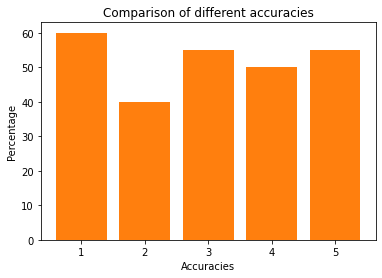

In [ ]:
# Call k_fold_cross_validation for alpha = 1
print("\nEvaluation with alpha value as 1\n")
best_data_set, accuracy = k_fold_cross_validation(1)

accuracy_plot = ['1', '2', '3', '4', '5']
plt.title("Comparison of different accuracies")
plt.xlabel("Accuracies")
plt.ylabel("Percentage")
plt.bar(accuracy_plot, accuracy)

# Call k_fold_cross_validation for alpha = 100
print("\nEvaluation with alpha value as 100\n")
best_data_set, accuracy = k_fold_cross_validation(100)

accuracy_plot = ['1', '2', '3', '4', '5']
plt.title("Comparison of different accuracies")
plt.xlabel("Accuracies")
plt.ylabel("Percentage")
plt.bar(accuracy_plot, accuracy)

#Top 10 words that predicts positive and negative class

In [ ]:
# *******************************************
# Derive Top 10 words that predicts positive and negative class from the training data set
# P(Positive | Word) = (P(Word | Positive) * P(Positive)) / P(Word) 

positive_words = {}
negative_words = {}
for index, row1 in train_dataset.iterrows():
    row_lower = row1['Sentences'].lower()
    row_split = row_lower.split()
    for expression in row_split:
      if expression in train_word_positive:
        prob_pos_g_word = (prob_pos_word_train[expression] * total_probability_positive) / prob_word_train[expression]
        positive_words[expression] = prob_pos_g_word
      if expression in train_word_negative:
        prob_neg_g_word = (prob_neg_word_train[expression] * total_probability_negative) / prob_word_train[expression]
        negative_words[expression] = prob_neg_g_word

print('\n Top 10 Positive words:\n')
count = 0
for word in sorted(positive_words, key=positive_words.get, reverse=True):
  count = count + number
  if count <= 10:
    print(word)
  else:
    break

print('\n Top 10 Negative words:\n')
count = 0
for word in sorted(negative_words, key=negative_words.get, reverse=True):
  count = count + number
  if count <= 10:
    print(word)
  else:
    break
# ******************************************* 




 Top 10 Positive words:

fits
order
cases
sharp
lot
free
love
pc
fantastic
perfectly

 Top 10 Negative words:

broke
return
difficult
week
joke
particular
model
smartphone
complaint
standard


#Final accuracy on test dataset

In [ ]:
# best_data_set, accuracy = k_fold_cross_validation(100)

dev_word_count, dev_word_positive, dev_word_negative = vocabulary_list(best_data_set)
prob_word_dev, prob_pos_word_dev, prob_neg_word_dev = conditional_probability(dev_word_count, dev_word_positive, dev_word_negative)
predicted_Score = [] 
# Test data
for index, row1 in test_dataset.iterrows():
  row_lower = row1['Sentences'].lower()
  row_split = row_lower.split()
  # Total probability of positive train and negative train
  prob_multiply_pos = (len(best_data_set[best_data_set['Score'] == number_1]))/(len(best_data_set))
  prob_multiply_neg = (len(best_data_set[best_data_set['Score'] == number_0]))/(len(best_data_set))
  for expression in row_split:
    if (expression in prob_pos_word_dev):
      prob_multiply_pos = prob_multiply_pos + np.log2(prob_pos_word_dev[expression])
    else:
      prob_multiply_pos = 0
    if (expression in prob_neg_word_dev):
      prob_multiply_neg = prob_multiply_neg + np.log2(prob_neg_word_dev[expression])
    else:
      prob_multiply_neg = 0

  # Add predicted score
  if prob_multiply_neg > prob_multiply_pos:
    predicted_Score.append(number_0)
  elif prob_multiply_pos >= prob_multiply_neg:
    predicted_Score.append(number_1)

test_dataset['Predcited_Score'] = predicted_Score

# Finding accuracy
failure_count = 0
for k in test_dataset.index:
  if (test_dataset['Score'][k] == test_dataset['Predcited_Score'][k]):
    failure_count = failure_count + 1

accuracy_test_data = (len(test_dataset) - failure_count)/len(test_dataset)
# print(accuracy_test_data)
accuracy_value = 100*accuracy_test_data
print("\n\n\nFinal accuracy on test dataset is " ,accuracy_value, "%")



Probability of the occurrence of the
0.13333333333333333

Conditional probability of the occurrence of the | Negative 
0.13270142180094788

Conditional probability of the occurrence of the | Positive 
0.09782608695652174

Probability of the occurrence of commercials
0.002898550724637681

Conditional probability of the occurrence of commercials | Negative 
0.004739336492890996

Probability of the occurrence of are
0.008695652173913044

Conditional probability of the occurrence of are | Negative 
0.009478672985781991

Conditional probability of the occurrence of are | Positive 
0.005434782608695652

Probability of the occurrence of most
0.005797101449275362

Conditional probability of the occurrence of most | Negative 
0.009478672985781991

Probability of the occurrence of misleading
0.002898550724637681

Conditional probability of the occurrence of misleading | Negative 
0.004739336492890996

Probability of the occurrence of im
0.002898550724637681

Conditional probability of the occur